In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, random_state=42, noise=0.1)

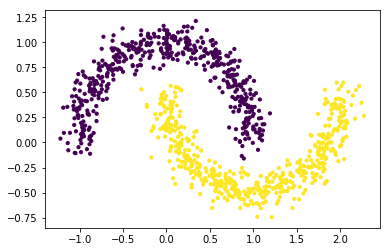

In [11]:
plt.scatter(X[:, 0], X[:, 1], s=10, c=y)


In [12]:
X

array([[-0.05146968,  0.44419863],
       [ 1.03201691, -0.41974116],
       [ 0.86789186, -0.25482711],
       ...,
       [ 1.68425911, -0.34822268],
       [-0.9672013 ,  0.26367208],
       [ 0.78758971,  0.61660945]])

In [13]:
X -= X.min()
X /= X.max()

In [14]:
X.min(), X.max()

(0.0, 1.0)

In [15]:
np.unique(y)

array([0, 1], dtype=int64)

In [16]:
X.shape, y.shape

((1000, 2), (1000,))

In [17]:
X = X.T

y = y.reshape(1, -1)

In [18]:
X.shape, y.shape

((2, 1000), (1, 1000))

In [20]:
# We are using sigmoid as an activation function so defining the sigmoid function here

# defining the Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [21]:
# defining the model architecture
inputLayer_neurons = X.shape[0]  # number of features in data set
hiddenLayer_neurons = 10  # number of hidden layers neurons
outputLayer_neurons = 1  # number of neurons at output layer

# initializing weight
weights_input_hidden = np.random.uniform(size=(inputLayer_neurons, hiddenLayer_neurons))
weights_hidden_output = np.random.uniform(
    size=(hiddenLayer_neurons, outputLayer_neurons)
)

# defining the parameters
lr = 0.1
epochs = 10000

losses = []
for epoch in range(epochs):
    ## Forward Propogation

    # calculating hidden layer activations
    hiddenLayer_linearTransform = np.dot(weights_input_hidden.T, X)
    hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)

    # calculating the output
    outputLayer_linearTransform = np.dot(
        weights_hidden_output.T, hiddenLayer_activations
    )
    output = sigmoid(outputLayer_linearTransform)

    ## Backward Propagation

    # calculating error
    error = np.square(y - output) / 2

    # calculating rate of change of error w.r.t weight between hidden and output layer
    error_wrt_output = -(y - output)
    output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))
    outputLayer_LinearTransform_wrt_weights_hidden_output = hiddenLayer_activations

    error_wrt_weights_hidden_output = np.dot(
        outputLayer_LinearTransform_wrt_weights_hidden_output,
        (error_wrt_output * output_wrt_outputLayer_LinearTransform).T,
    )

    # calculating rate of change of error w.r.t weights between input and hidden layer
    outputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
    hiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(
        hiddenLayer_activations, (1 - hiddenLayer_activations)
    )
    hiddenLayer_linearTransform_wrt_weights_input_hidden = X
    error_wrt_weights_input_hidden = np.dot(
        hiddenLayer_linearTransform_wrt_weights_input_hidden,
        (
            hiddenLayer_activations_wrt_hiddenLayer_linearTransform
            * np.dot(
                outputLayer_LinearTransform_wrt_hiddenLayer_activations,
                (output_wrt_outputLayer_LinearTransform * error_wrt_output),
            )
        ).T,
    )

    # updating the weights
    weights_hidden_output = weights_hidden_output - lr * error_wrt_weights_hidden_output
    weights_input_hidden = weights_input_hidden - lr * error_wrt_weights_input_hidden

    # print error at every 100th epoch
    epoch_loss = np.average(error)
    if epoch % 1000 == 0:
        print(f"Error at epoch {epoch} is {epoch_loss:.5f}")

    # appending the error of each epoch
    losses.append(epoch_loss)

Error at epoch 0 is 0.23418
Error at epoch 1000 is 0.04398
Error at epoch 2000 is 0.01615
Error at epoch 3000 is 0.00864
Error at epoch 4000 is 0.00789
Error at epoch 5000 is 0.00740
Error at epoch 6000 is 0.00706
Error at epoch 7000 is 0.00666
Error at epoch 8000 is 0.00656
Error at epoch 9000 is 0.00629


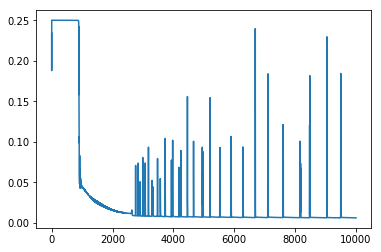

In [22]:
# visualizing the error after each epoch
plt.plot(np.arange(1, epochs + 1), np.array(losses))

In [23]:
# final output from the model
output[:, :5]

array([[9.68181817e-01, 9.99658333e-01, 9.98863769e-01, 9.99787638e-01,
        1.71063589e-10]])

In [25]:
y[:, :5]

array([[1, 1, 1, 1, 0]], dtype=int64)

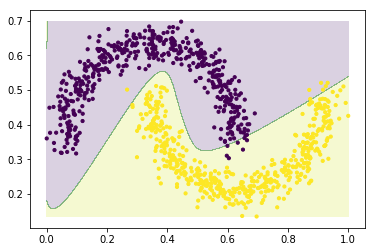

In [26]:
# Define region of interest by data limits
steps = 1000
x_span = np.linspace(X[0, :].min(), X[0, :].max(), steps)
y_span = np.linspace(X[1, :].min(), X[1, :].max(), steps)
xx, yy = np.meshgrid(x_span, y_span)

# forward pass for region of interest
hiddenLayer_linearTransform = np.dot(
    weights_input_hidden.T, np.c_[xx.ravel(), yy.ravel()].T
)
hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)
outputLayer_linearTransform = np.dot(weights_hidden_output.T, hiddenLayer_activations)
output_span = sigmoid(outputLayer_linearTransform)

# Make predictions across region of interest
labels = (output_span > 0.5).astype(int)

# Plot decision boundary in region of interest
z = labels.reshape(xx.shape)
fig, ax = plt.subplots()
ax.contourf(xx, yy, z, alpha=0.2)

# Get predicted labels on training data and plot
train_labels = (output > 0.5).astype(int)

# create scatter plot
ax.scatter(X[0, :], X[1, :], s=10, c=y.squeeze())